In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
path = "./output/6/sp500_split_04FEB2020-okay.out"
result = pickle.load(open(path, "rb"))
len(result)

100

In [12]:
def drawHist(result, col, name, xlabel, ylabel):
    data_list = [tmp[col] for tmp in result]
    result_df = pd.DataFrame(result)
    data_series = pd.Series(data_list, name=name)
    # Plotting hist without kde
    ax = sns.distplot(data_series, kde=False, bins=20)
    # Creating another Y axis
    second_ax = ax.twinx()
    #Plotting kde without hist on the second Y axis
    sns.distplot(data_series, ax=second_ax, kde=True, hist=False, bins=20)
    #Removing Y ticks from the second axis
    second_ax.set_yticks([])
    ax.set(xlabel = xlabel, ylabel = ylabel, title = name)

In [20]:
def drawScatter(result, col, name, xlabel, ylabel):
    result_df = pd.DataFrame(result)
    plt.scatter(result_df['total_shares_sold'], result_df[col])
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

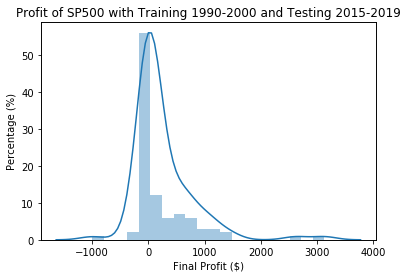

In [28]:
name = "Profit of SP500 with Training 1990-2000 and Testing 2015-2019"
xlabel = "Final Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

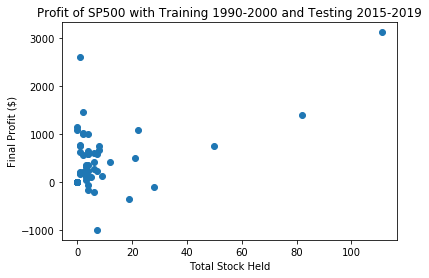

In [29]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

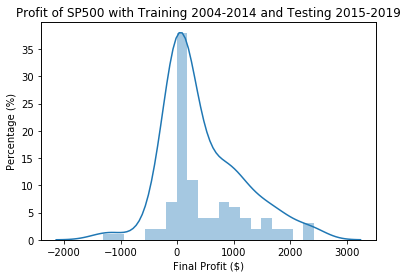

In [31]:
name = "Profit of SP500 with Training 2004-2014 and Testing 2015-2019"
xlabel = "Final Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

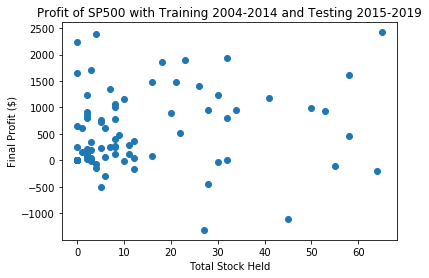

In [32]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

In [5]:
avg_list = [tmp['mean'] for tmp in result]
len(avg_list)

100

(array([ 1.,  1.,  0.,  0.,  0.,  3.,  4.,  4.,  5.,  6., 17., 19., 15.,
         8.,  7.,  1.,  3.,  4.,  0.,  2.]),
 array([-2671.88908194, -2405.28826093, -2138.68743992, -1872.08661891,
        -1605.4857979 , -1338.88497688, -1072.28415587,  -805.68333486,
         -539.08251385,  -272.48169284,    -5.88087182,   260.71994919,
          527.3207702 ,   793.92159121,  1060.52241222,  1327.12323324,
         1593.72405425,  1860.32487526,  2126.92569627,  2393.52651728,
         2660.1273383 ]),
 <a list of 20 Patch objects>)

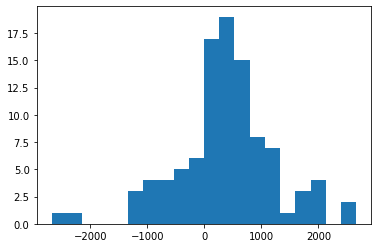

In [71]:
plt.hist(avg_list, bins=20)

In [53]:
pickle.dump(result, open("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.out", "wb"))

In [9]:
result_df = pd.DataFrame(result)
# result_df.to_csv("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.csv")

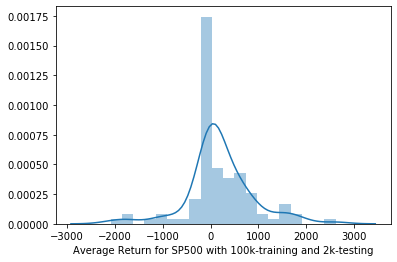

In [6]:
avg_series = pd.Series(avg_list, name="Average Return for SP500 with 100k-training and 2k-testing")
sns.distplot(avg_series, bins=20);

[]

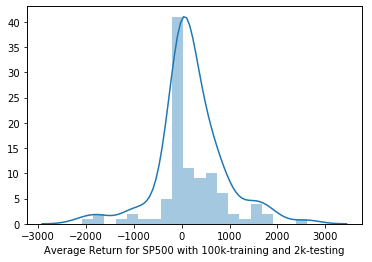

In [7]:
# Plotting hist without kde
ax = sns.distplot(avg_series, kde=False, bins=20)

# Creating another Y axis
second_ax = ax.twinx()

#Plotting kde without hist on the second Y axis
sns.distplot(avg_series, ax=second_ax, kde=True, hist=False, bins=20)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

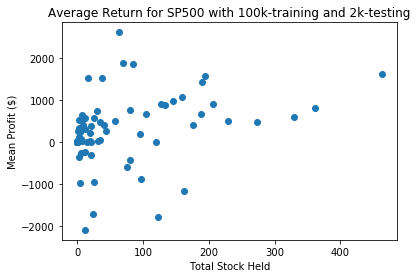

In [10]:
plt.scatter(result_df['total_shares_sold'], result_df['mean'])
plt.title("Average Return for SP500 with 100k-training and 2k-testing")
plt.xlabel("Total Stock Held")
plt.ylabel("Mean Profit ($)")
plt.show()